# Anime Recommendation System
The anime recommendation system uses machine learning to provide personalized recommendations based on user preferences. By analyzing factors such as genre, plot, and characters, the system generates accurate and relevant recommendations. 

Users can input their favorite anime titles or genres to receive tailored recommendations, making it easy to discover new content and enjoy their favorite shows.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore")

## Loading Data

#### Anime Dataset

In [2]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Data Cleaning and Preprocessing

### Obtaining Data Types Info

In [3]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

### Finding Duplicated Rows

In [4]:
print(df.duplicated().sum(), 'duplicated data')

# Since there is no duplicated data, below step is not necessary
df = df.drop_duplicates()

0 duplicated data


### Getting Unique Values

In [5]:
# Finding the number of unique values in each column
print(df.nunique())

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64


### Checking and Cleaning for Null Values

In [6]:
# Checking for null values
print(df.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [7]:
# Removing the rows with null values
df = df.dropna()
print(df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


### Finding N/A Values

In [8]:
# Finding missing values or n/a values in each column
print(df.isna().sum())

# N/A is already cleaned due to null removal in previous step

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


### Finding Multi-Collinearity

#### Using VIF Method

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creates a list of predictor variable names
predictors = ['anime_id', 'rating', 'members']

# Calculates VIF for each predictor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[predictors].values, i) for i in range(df[predictors].shape[1])]
vif["features"] = predictors
vif 

# Since no value is above 5 or 10, this shows that there is no multicollinearity

,VIF Factor,features
0,2.201195,anime_id
1,2.446541,rating
2,1.172323,members


## Exploratory Data Analysis (EDA)

### Converting Data 

In [10]:
# First look of the data
df['name'].head(10)

0                                       Kimi no Na wa.
1                     Fullmetal Alchemist: Brotherhood
2                                             Gintama°
3                                          Steins;Gate
4                                        Gintama&#039;
5    Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
6                               Hunter x Hunter (2011)
7                                 Ginga Eiyuu Densetsu
8    Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
9                             Gintama&#039;: Enchousen
Name: name, dtype: object

In [11]:
# Converts text to lowercase
df['name'] = df['name'].str.lower()
df['name'].head(10)

0                                       kimi no na wa.
1                     fullmetal alchemist: brotherhood
2                                             gintama°
3                                          steins;gate
4                                        gintama&#039;
5    haikyuu!!: karasuno koukou vs shiratorizawa ga...
6                               hunter x hunter (2011)
7                                 ginga eiyuu densetsu
8    gintama movie: kanketsu-hen - yorozuya yo eien...
9                             gintama&#039;: enchousen
Name: name, dtype: object

In [12]:
# Removes punctuation and special characters
df['name'] = df['name'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['name'].head(10)

0                                        kimi no na wa
1                      fullmetal alchemist brotherhood
2                                              gintama
3                                           steinsgate
4                                           gintama039
5    haikyuu karasuno koukou vs shiratorizawa gakue...
6                                 hunter x hunter 2011
7                                 ginga eiyuu densetsu
8     gintama movie kanketsuhen  yorozuya yo eien nare
9                                 gintama039 enchousen
Name: name, dtype: object

In [13]:
# Removing stop words (words that do not add much meaning to a sentence)
## Examples are A, An, The, Is, Are, Was, Were, etc.
stopwords = nltk.corpus.stopwords.words('english')

# Generating a list of non-stopwords in the name column and print the list
df['name'] = df['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df['name'].head(10)

0                                           kimi na wa
1                      fullmetal alchemist brotherhood
2                                              gintama
3                                           steinsgate
4                                           gintama039
5    haikyuu karasuno koukou vs shiratorizawa gakue...
6                                 hunter x hunter 2011
7                                 ginga eiyuu densetsu
8      gintama movie kanketsuhen yorozuya yo eien nare
9                                 gintama039 enchousen
Name: name, dtype: object

In [14]:
# Tokenizes text (Splitting text into a list of words)
df['tokens'] = df['name'].apply(lambda x: nltk.word_tokenize(x))
df['tokens'].head(10)

0                                       [kimi, na, wa]
1                  [fullmetal, alchemist, brotherhood]
2                                            [gintama]
3                                         [steinsgate]
4                                         [gintama039]
5    [haikyuu, karasuno, koukou, vs, shiratorizawa,...
6                            [hunter, x, hunter, 2011]
7                             [ginga, eiyuu, densetsu]
8    [gintama, movie, kanketsuhen, yorozuya, yo, ei...
9                              [gintama039, enchousen]
Name: tokens, dtype: object

In [15]:
# Flattening the list of non-stopword names into a single list
non_stopwords = [word for tokens in df['tokens'] for word in tokens if word not in stopwords]
print(non_stopwords)

['kimi', 'na', 'wa', 'fullmetal', 'alchemist', 'brotherhood', 'gintama', 'steinsgate', 'gintama039', 'haikyuu', 'karasuno', 'koukou', 'vs', 'shiratorizawa', 'gakuen', 'koukou', 'hunter', 'x', 'hunter', '2011', 'ginga', 'eiyuu', 'densetsu', 'gintama', 'movie', 'kanketsuhen', 'yorozuya', 'yo', 'eien', 'nare', 'gintama039', 'enchousen', 'clannad', 'story', 'koe', 'katachi', 'gintama', 'code', 'geass', 'hangyaku', 'lelouch', 'r2', 'haikyuu', 'second', 'season', 'sen', 'chihiro', 'kamikakushi', 'shigatsu', 'wa', 'kimi', 'uso', 'mushishi', 'zoku', 'shou', '2nd', 'season', 'ookami', 'kodomo', 'ame', 'yuki', 'code', 'geass', 'hangyaku', 'lelouch', 'hajime', 'ippo', 'rurouni', 'kenshin', 'meiji', 'kenkaku', 'romantan', 'tsuiokuhen', 'cowboy', 'bebop', 'one', 'punch', 'man', 'mononoke', 'hime', 'suzumiya', 'haruhi', 'shoushitsu', 'monogatari', 'series', 'second', 'season', 'mushishi', 'zoku', 'shou', 'mushishi', 'tengen', 'toppa', 'gurren', 'lagann', 'great', 'teacher', 'onizuka', 'natsume', 'yu

In [16]:
# Creating a frequency distribution of the non-stopwords
fdist = nltk.FreqDist(non_stopwords)
  
# Prints the 10 most frequent words
print(fdist.most_common(10))

[('movie', 453), ('ni', 303), ('specials', 298), ('wa', 292), ('special', 245), ('ga', 232), ('2', 230), ('wo', 229), ('ova', 225), ('animation', 217)]


#### Word Count

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating a document-term matrix 
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['name'])

# Computing the co-occurrence matrix of words
co_occurrence_matrix = (dtm.T * dtm)
 
# Converting the co-occurrence matrix to a pandas dataframe
co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), index=vectorizer.get_feature_names(), columns=vectorizer.get_feature_names())
co_occurrence_df

,00,000,0008,001,0011,0017,003,005bin,007,0072,...,zutto,zvezda,zwei,zx,zz,étude,üks,ēldlive,μ039s,ψnan
00,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0008,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0011,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
étude,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
üks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
ēldlive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
μ039s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


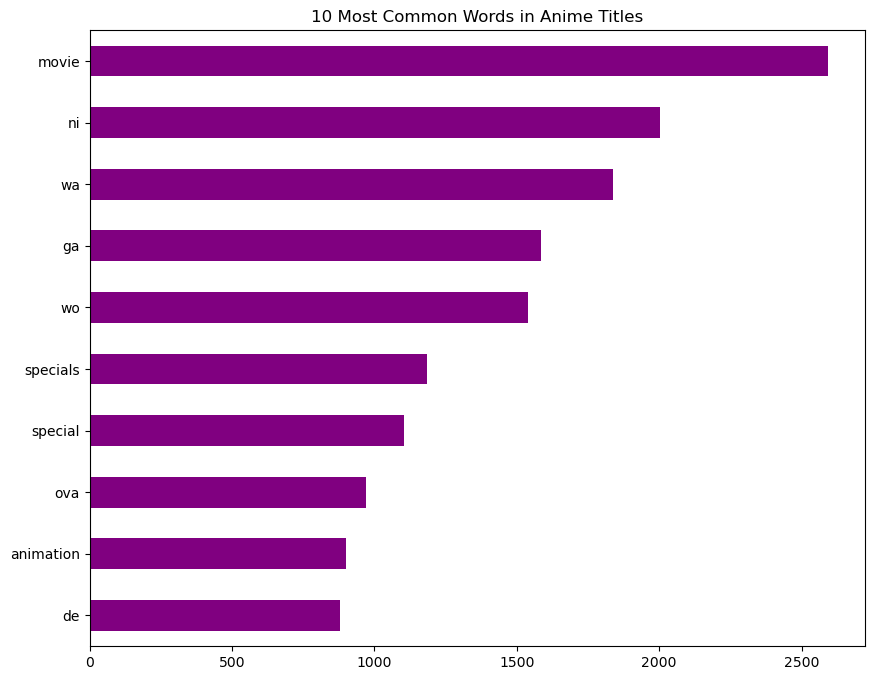

In [18]:
# Getting the top 10 most common words
top_10 = co_occurrence_df.sum().sort_values(ascending=False).head(10)
 
# Plotting them out
top_10.sort_values().plot.barh(figsize=(10, 8), color="purple")
plt.title("10 Most Common Words in Anime Titles")
plt.show()

### Word Cloud (Overall)
This word cloud focuses on overall words present in the anime dataset, including terms like OVA, movie, specials (that is used to describe the anime type)

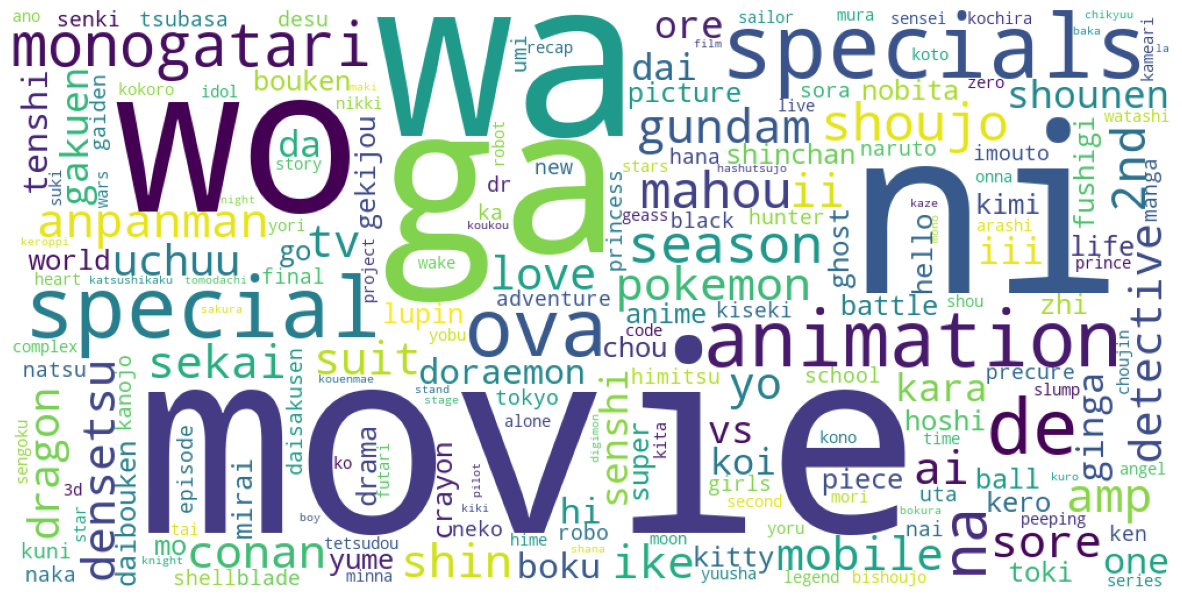

In [19]:
# Create a word cloud of words
wordcloud = WordCloud(background_color="white", width=1000, height=500).generate_from_frequencies(frequencies=co_occurrence_df.sum())
 
# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
    

### TF-IDF Vectorizer in Natural Language Processing (NLP)
IF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document in a collection of documents. The TF-IDF vectorizer is a tool used in natural language processing (NLP) to transform text data into a format that can be easily analyzed by machine learning algorithms.

The TF-IDF vectorizer works by first counting the frequency of each word in a document (the term frequency, or TF), then multiplying this count by the inverse document frequency (IDF) of that word across all documents in the corpus

#### In Short
TF-IDF is a measure of how important a word is in a document by taking account of the word's frequency (count), relative to all the documents in a collection.

In [20]:
# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words=stopwords, ngram_range=(1,1))
tfidf.fit(df['name'])

# Creates TF-IDF matrix
tfidf_matrix = tfidf.transform(df['name']) 
tfidf_matrix.shape

(12017, 1000)

In [21]:
from sklearn.preprocessing import normalize

# Normalizes TF-IDF matrix
tfidf_norm = normalize(tfidf_matrix) 
tfidf_norm.shape

(12017, 1000)

### Word Cloud (TF-IDF Dictionaries)
This word cloud focuses on words that are related to naming structure of anime names in the anime dataset. (Basically based on how anime names are presented, removing words like OVA, Specials, Movies, stuff that defines the anime type)

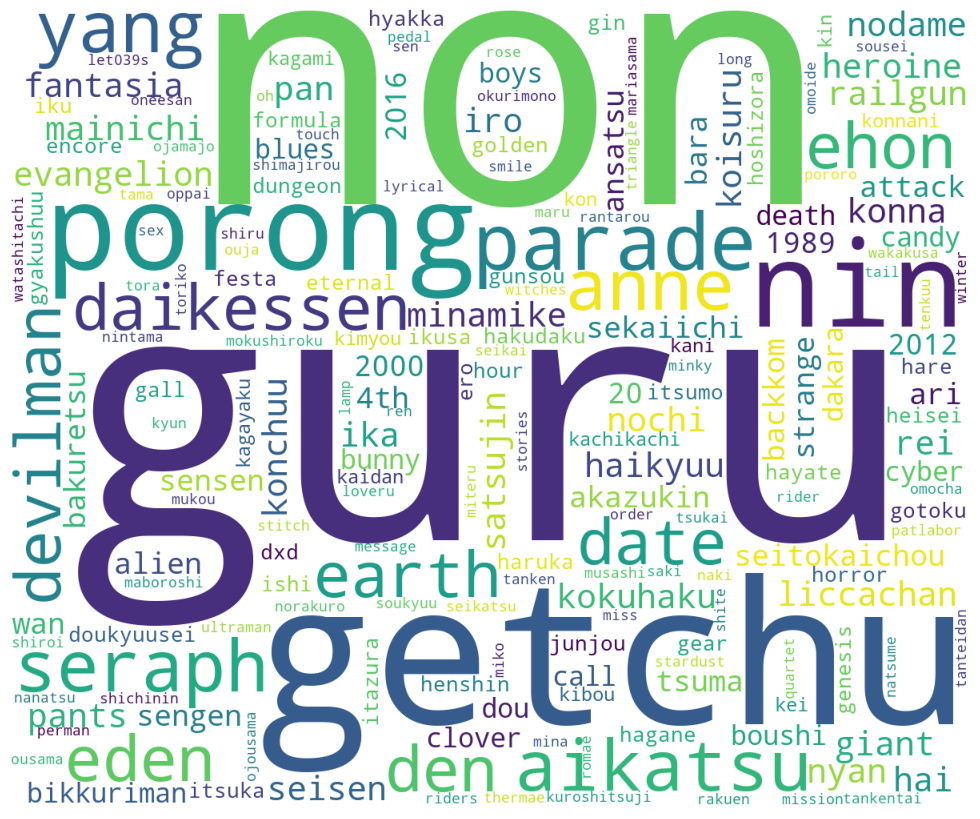

In [22]:
# Convert the sparse matrix to a dictionary of term frequencies
tfidf_dict = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))

# Generates a word cloud
wordcloud = WordCloud(background_color='white', width=1200, height=1000).generate_from_frequencies(tfidf_dict)
 
# Plots the word cloud
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
 

## Feature Engineering

### Cosine Similarity

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Creates a document-term matrix from anime.csv file
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['name'])

# Calculates the cosine similarity between all pairs of documents
cos_sim_matrix = cosine_similarity(dtm)
print(cos_sim_matrix)
         

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.75592895 0.        ]
 [0.         0.         0.         ... 0.75592895 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [24]:
def get_similar_anime(anime_name, top_n=10):
    # Gets anime index using its name
    anime_idx = df[df['name'] == anime_name].index[0]
    
    # Pairwsie similarity score 
    pairwise_similarity = cos_sim_matrix[anime_idx]
    
    # Sort the animes based on the similarity scores
    anime_idx_sorted = np.argsort(pairwise_similarity)[::-1]
    
    # Gets the top 10 similar anime
    top_n_anime = anime_idx_sorted[0:top_n]
    
    # Prints the names of top 10 similar anime
    for i in top_n_anime:
        print(df.iloc[i]['name'])

In [25]:
get_similar_anime('dragon ball')

dragon ball
dragon ball z
dragon ball specials
dragon ball super
dragon ball kai
dragon ball z zenbu misemasu toshi wasure dragon ball z
dragon ball gt
dragon ball kai 2014
dragon ball episode bardock
dragon ball z movie 15 fukkatsu f


In [26]:
get_similar_anime('one piece', 15)

one piece
one piece kinkyuu kikaku one piece kanzen kouryakuhou
one piece recap
one piece film z
one piece movie 1
one piece adventure nebulandia
one piece glorious island
one piece romance dawn
piece
one
one piece film gold
one piece cry heart
one piece heart gold
one piece movie 2 nejimakijima daibouken
one piece episode alabasta prologue


In [27]:
get_similar_anime('naruto', 20)

naruto
naruto x ut
naruto shippuuden
naruto honoo chuunin shiken naruto vs konohamaru
naruto soyokazeden movie naruto mashin mitsu onegai dattebayo
boruto naruto movie naruto ga hokage ni natta hi
naruto shippuuden movie 1
last naruto movie
naruto cross roads
boruto naruto movie
naruto shippuuden movie 2 kizuna
naruto shippuuden movie 6 road ninja
naruto shippuuden sunny side battle
naruto shippuuden movie 4 lost tower
naruto shippuuden movie 5 blood prison
naruto akaki yotsuba clover wo sagase
naruto shippuuden shippuu quotkonoha gakuenquot den
naruto takigakure shitou ore ga eiyuu dattebayo
naruto sd rock lee seishun fullpower ninden
naruto movie 2 dai gekitotsu maboroshi chiteiiseki dattebayo
